In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

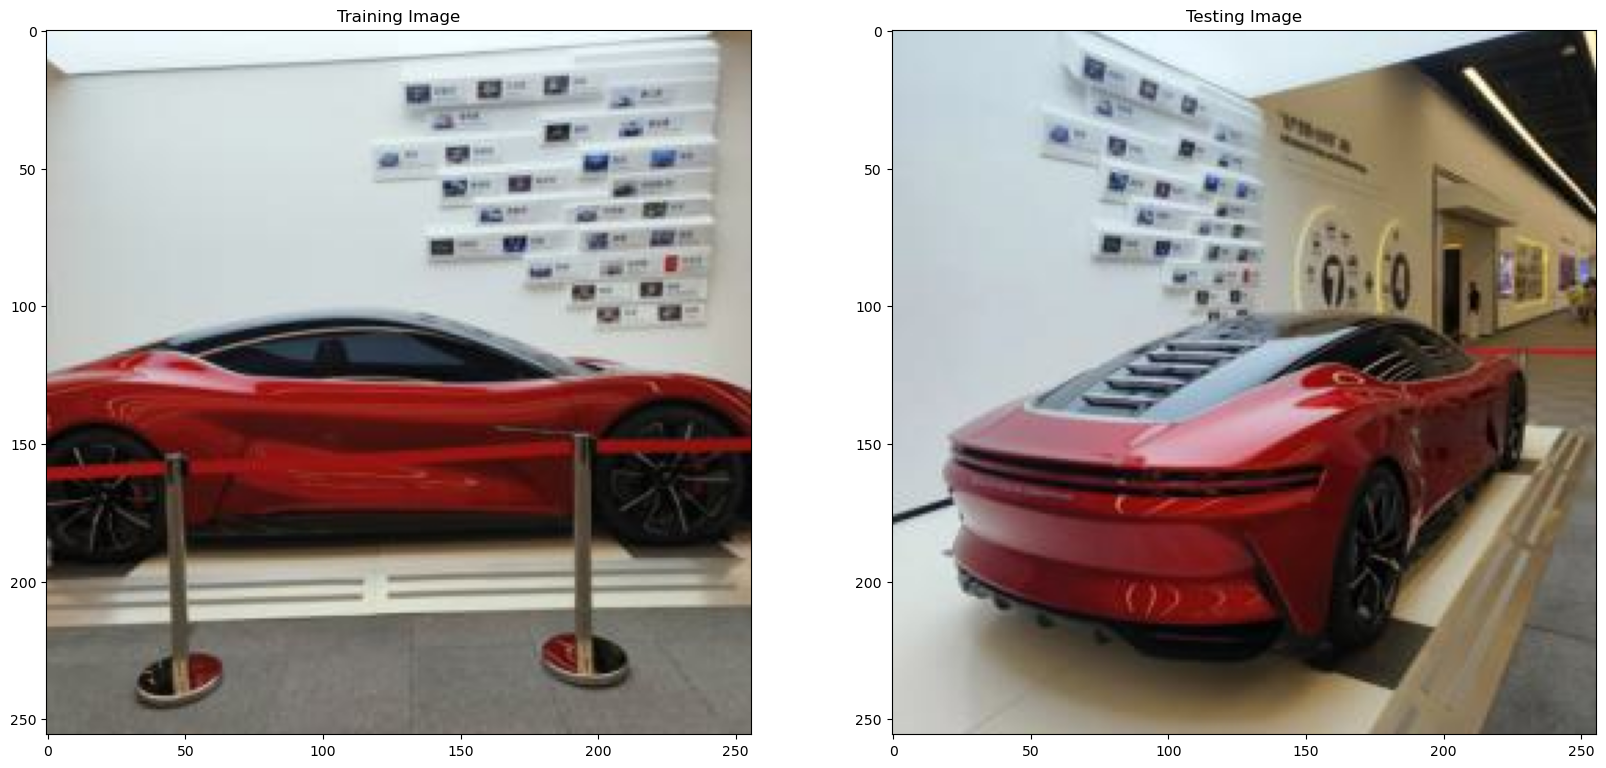

In [32]:
img = cv.imread('./dataset/img_256/05.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

test = cv.imread('./dataset/img_256/09.jpg', cv.IMREAD_COLOR)
test_rgb = cv.cvtColor(test, cv.COLOR_BGR2RGB)
test_gray = cv.cvtColor(test, cv.COLOR_BGR2GRAY)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(img_rgb)

plots[1].set_title("Testing Image")
plots[1].imshow(test_rgb)

Number of Keypoints Detected In The Training Image:  271
Number of Keypoints Detected In The Query Image:  368


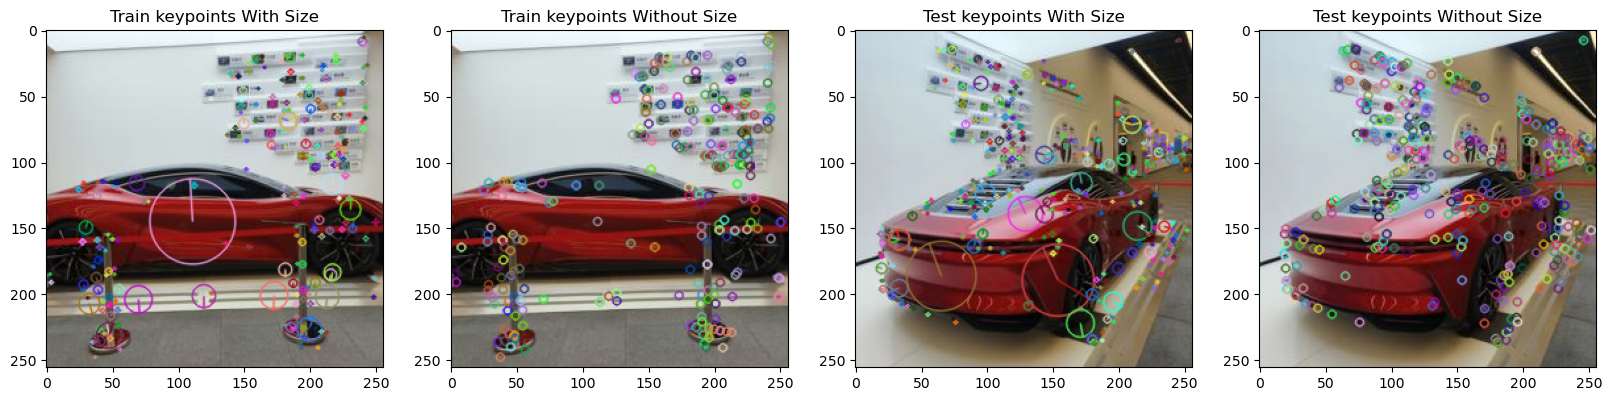

In [41]:
sift = cv.SIFT_create()
img_kp, img_desc = sift.detectAndCompute(img_gray, None)
test_kp, test_desc = sift.detectAndCompute(test_gray, None)

img_kp_size = np.copy(img)
img_kp_no_size = np.copy(img)

cv.drawKeypoints(img, img_kp, img_kp_size, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.drawKeypoints(img, img_kp, img_kp_no_size, flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)

test_kp_size = np.copy(test)
test_kp_no_size = np.copy(test)

cv.drawKeypoints(test, test_kp, test_kp_size, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.drawKeypoints(test, test_kp, test_kp_no_size, flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)

fx, plots = plt.subplots(1, 4, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(cv.cvtColor(img_kp_size, cv.COLOR_BGR2RGB), cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(cv.cvtColor(img_kp_no_size, cv.COLOR_BGR2RGB), cmap='gray')

plots[2].set_title("Test keypoints With Size")
plots[2].imshow(cv.cvtColor(test_kp_size, cv.COLOR_BGR2RGB), cmap='gray')

plots[3].set_title("Test keypoints Without Size")
plots[3].imshow(cv.cvtColor(test_kp_no_size, cv.COLOR_BGR2RGB), cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(img_kp))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_kp))

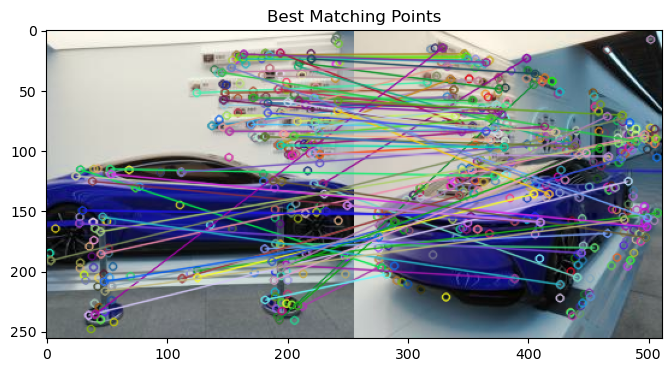


Number of Matching Keypoints Between The Training and Query Images:  89


In [42]:
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(img_desc, test_desc)
matches = sorted(matches, key=lambda x: x.distance)

result = cv.drawMatches(img, img_kp, test, test_kp, matches, test, flags=8)

plt.rcParams['figure.figsize'] = [8, 4.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [35]:
# img = cv.imread('./dataset/img_256/16.jpg')
# gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# sift = cv.SIFT_create()
# kp = sift.detect(gray,None)
# img=cv.drawKeypoints(gray,kp,img)
# plt.imshow(img)

In [36]:
# img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(img)